In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parámetros
fs = 50000   # Frecuencia de muestreo
fc = 24000   # Frecuencia de la portadora
fb = 200     # Frecuencia de bit (T_b = 5ms)
N = fs // fb # Muestras por bit (250)

In [5]:
# Generar una secuencia de bits aleatoria
np.random.seed(412)
bits = np.random.choice([0, 1], size=20)  # 20 bits aleatorios
print("BITS: ", bits)

BITS:  [0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0]


In [11]:
# Construir la señal MSK modulada
t = np.arange(0, len(bits) * N) / fs  # Vector de tiempo
fase = np.zeros_like(t)

for i, bit in enumerate(bits):
    fase[i * N:(i + 1) * N] = np.pi * bit  # 0 para "0", π para "1"

# Construir I(t) y Q(t)
I = np.cos(2 * np.pi * fc * t + fase)
Q = np.sin(2 * np.pi * fc * t + fase)

# Señal MSK
senal_msk = I  # En señales reales, solo tenemos un canal (no I/Q separados)

# Simular una señal PPS con pulsos cada 1 segundo
pps = np.zeros_like(t)
pps[::fs] = 1  # Pulso cada segundo

In [12]:
# Encontrar los flancos de subida del PPS
pps_flancos = np.where(np.diff(pps) > 0)[0]  # Índices donde sube el PPS

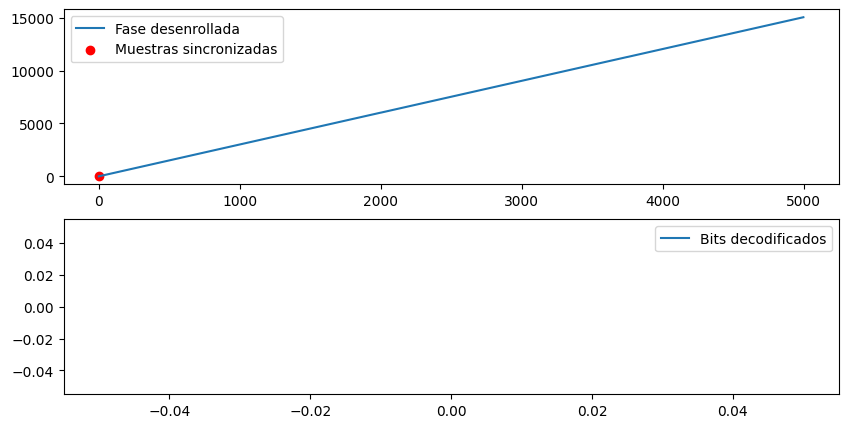

Bits originales:    [0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0]
Bits decodificados: []


In [15]:
# Definir tiempos de muestreo de bits sincronizados con PPS
bit_times = np.array([0])#np.array([pps_flancos[0] + i * N for i in range(len(bits))])

# Demodulación de fase
theta = np.arctan2(Q, I)
theta_unwrapped = np.unwrap(theta)

# Muestrear en los tiempos correctos
theta_sampled = theta_unwrapped[bit_times]

# Extraer los bits con los cambios de fase
dtheta = np.diff(theta_sampled)
bits_decodificados = (dtheta > 0).astype(int)

# Graficar la fase y los bits extraídos
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(theta_unwrapped, label="Fase desenrollada")
plt.scatter(bit_times, theta_sampled, color='r', label="Muestras sincronizadas")
plt.legend()

plt.subplot(2, 1, 2)
plt.step(range(len(bits_decodificados)), bits_decodificados, label="Bits decodificados", where='mid')
plt.legend()

plt.show()

# Comparar bits originales vs decodificados
print(f"Bits originales:    {bits}")
print(f"Bits decodificados: {bits_decodificados}")

In [14]:
np.where(np.diff(pps) > 0)

(array([], dtype=int64),)

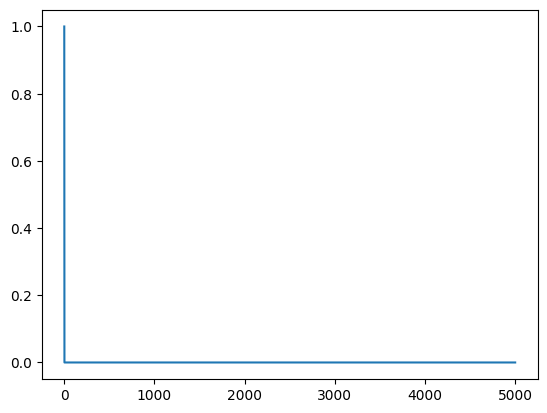

In [8]:
plt.plot(pps)

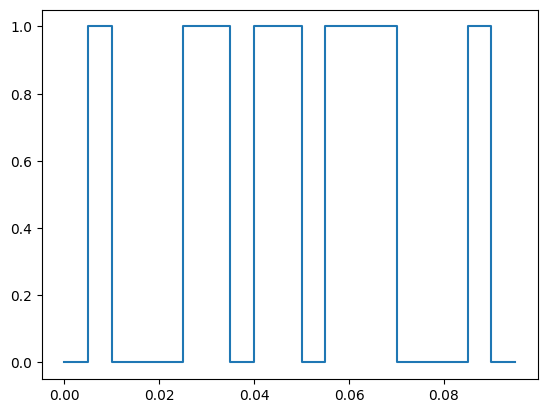

In [18]:
plt.step(np.arange(len(bits))/fb, bits)